# Deliverable #2 - 

### Data Source:
Reading stock data from Yahoo using Yahoo Finance API. For this we have to use a python library called **yfinance** .Yahoo Finance API provides access to more than five years of daily OHLC price data. Also, you can get minutes OHLC data for recent days.Using the Yahoo API (without authentication), you are limited to 2,000 requests per hour per IP or up to a total of 48,000 requests a day.
 

I am using S&P 500 Companies list from this source: https://datahub.io/core/s-and-p-500-companies/r/0.html

### Acknowledgements:

Used Yahoo Finance to get historical data

In [140]:
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

Firstly we will be requesting stock information with yfinance, and handle that data by creating data  frames using pandas .

In [141]:
sp500 = pd.read_csv("sp500.csv") # this provides us with S&P 500 Companies Stock Symbols, Names and their corresponding Industrial Sectors
sp500.head(5)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,ABIOMED Inc,Health Care


selecting 5 random tech companies from S&P 500 companies list

In [143]:
tech = sp500.loc[sp500["Sector"]=="Information Technology"].sample(5) # selcting tech companies
tech

,Symbol,Name,Sector
489,WU,Western Union Co,Information Technology
14,AKAM,Akamai Technologies Inc,Information Technology
114,CTSH,Cognizant Technology Solutions,Information Technology
346,NVDA,Nvidia Corporation,Information Technology
303,MA,Mastercard Inc.,Information Technology


In [144]:
my_stock_list = tech['Symbol'].to_list()
company_list=[]
for stock in my_stock_list:
    globals()[stock] = yf.Ticker(stock).history(period="2y") # 2 years data till current date
    company_list.append(globals()[stock])

In [145]:
company_name = tech['Name'].to_list()

for company,com_name in zip(my_stock_list,company_name):
    (globals()[company])["Name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [146]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
Date,,,,,,,,
2018-10-29,16.440084,16.578936,16.097582,16.282719,5610300,0.0,0,Western Union Co
2018-10-30,16.310486,16.541906,16.254944,16.541906,6098500,0.0,0,Western Union Co
2018-10-31,16.967722,16.967722,16.652991,16.699276,7538700,0.0,0,Western Union Co
2018-11-01,16.690021,16.819615,16.578938,16.727047,5443500,0.0,0,Western Union Co
2018-11-02,16.495622,17.041774,16.486365,16.578934,6902700,0.0,0,Western Union Co


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2510 entries, 2018-10-29 to 2020-10-26
Data columns (total 8 columns):
Open            2510 non-null float64
High            2510 non-null float64
Low             2510 non-null float64
Close           2510 non-null float64
Volume          2510 non-null int64
Dividends       2510 non-null float64
Stock Splits    2510 non-null int64
Name            2510 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 176.5+ KB


In [148]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2510.000000,2510.000000,2510.000000,2510.000000,2.510000e+03,2510.000000,2510.0
mean,138.600457,140.531100,136.609549,138.655851,5.645597e+06,0.002998,0.0
std,117.283409,119.042934,115.391486,117.290741,5.142700e+06,0.027886,0.0
min,15.552080,15.785876,15.355693,15.477266,2.774000e+05,0.000000,0.0
25%,59.533613,60.074968,58.775122,59.460202,2.533750e+06,0.000000,0.0
50%,87.850002,88.845001,86.724998,88.049999,3.927850e+06,0.000000,0.0
75%,221.921650,225.657487,219.262814,222.662315,7.070650e+06,0.000000,0.0
max,588.150024,589.070007,560.750000,573.859985,6.278820e+07,0.400000,0.0


### What was the change in price of a specific stock over time of 2 years?

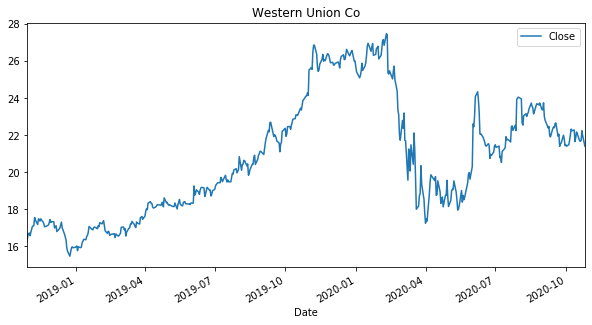

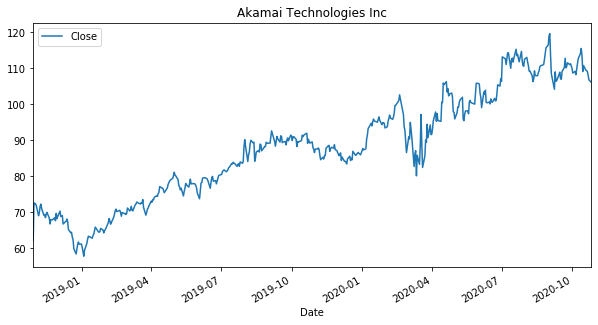

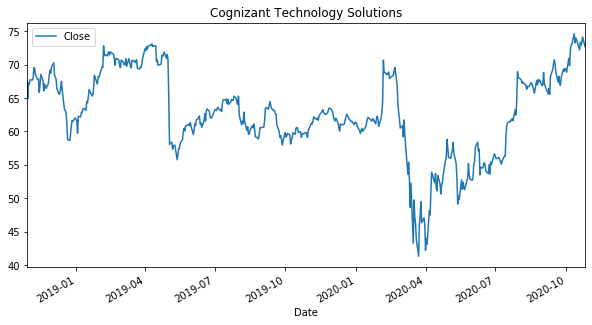

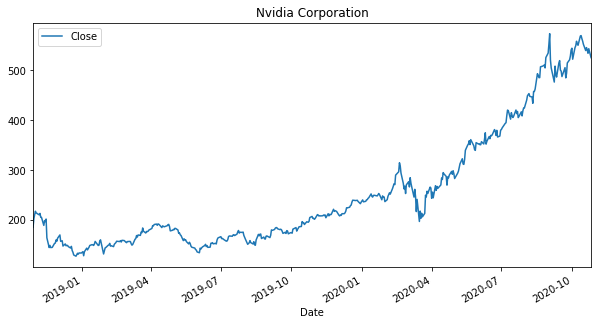

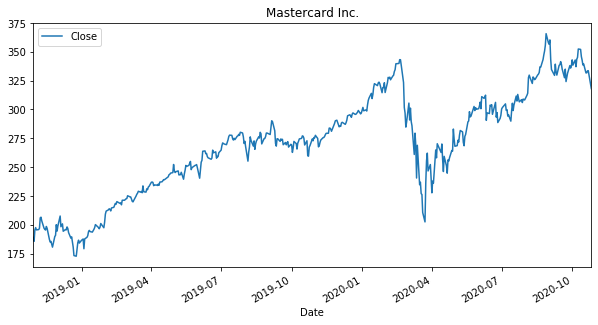

In [149]:
for company in company_list:
    company[['Close']].plot(figsize=(10,5)).set_title(str(company["Name"][0])) # plotting closing price of each company over the time of two years

### What was the moving average of above listed stocks?

In [150]:
ma_period = [30, 90, 120]

for period in ma_period:
    for company in company_list:
        new_column = "MA for " + str(period) + " days" 
        company[new_column] = company['Close'].rolling(period).mean() # calculating moving average

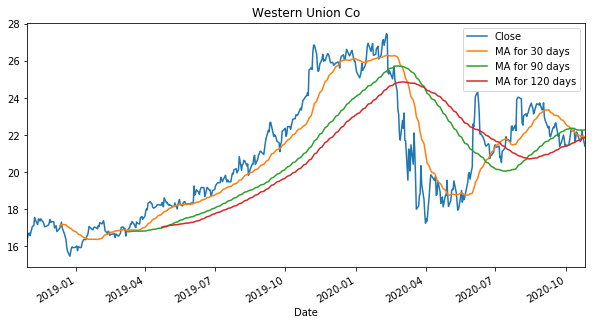

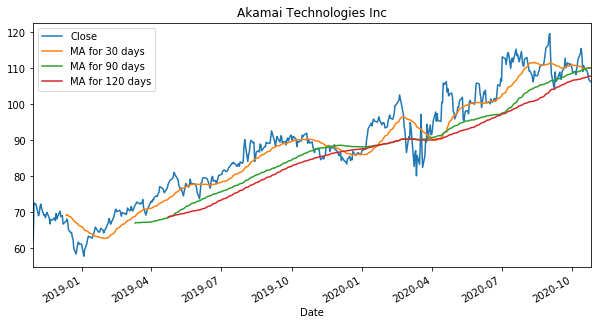

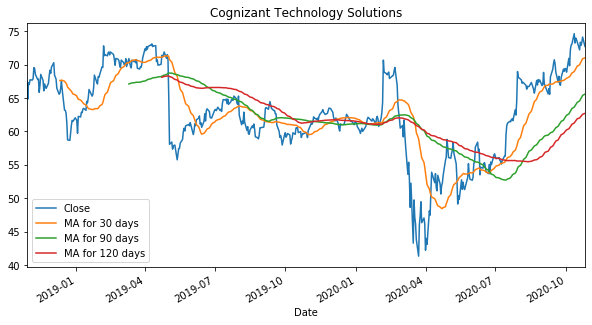

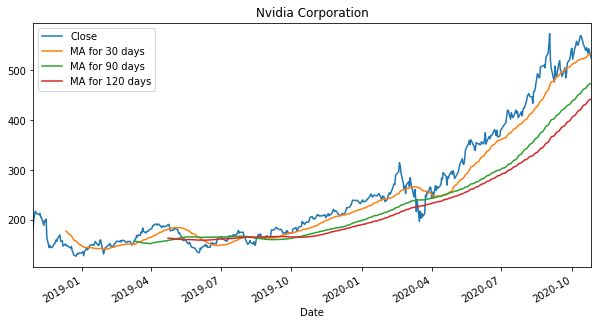

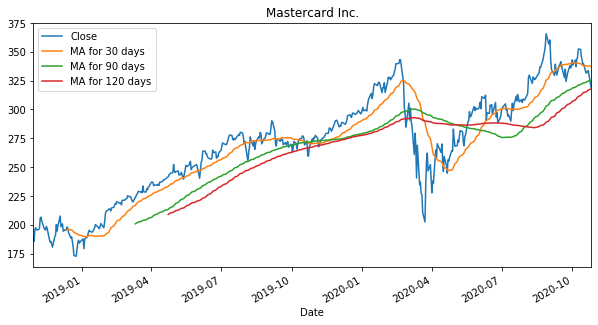

In [151]:
for company in company_list:
    company[["Close","MA for 30 days","MA for 90 days","MA for 120 days"]].plot(figsize=(10,5)).set_title(str(company["Name"][0]))

## To be continued...